## Integrated Pulmonary Fibrosis (PF) cell atlas

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct

Running Scanpy 1.8.2, on 2022-12-28 09:54.


In [2]:
## path variables
adata_dir = '/home/niklas/data/210514_IPF_atlas_human/210611_in_vivo_reference_NIKLAS.h5ad'
project_dir = '/home/niklas/projects/niche_environments_FIBROSIS/IPF_cell_atlas_reference_CPC/01_data/marker_table/'

In [3]:
## plotting variables
sc.settings.figdir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/'
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir)

In [5]:
## have a look at the adata object: 561279 cells
adata

AnnData object with n_obs × n_vars = 559936 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    

In [6]:
adata = adata[-adata.obs.data_set.isin(['denver_copd_ipf'])]

In [7]:
adata

View of AnnData object with n_obs × n_vars = 480445 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'P

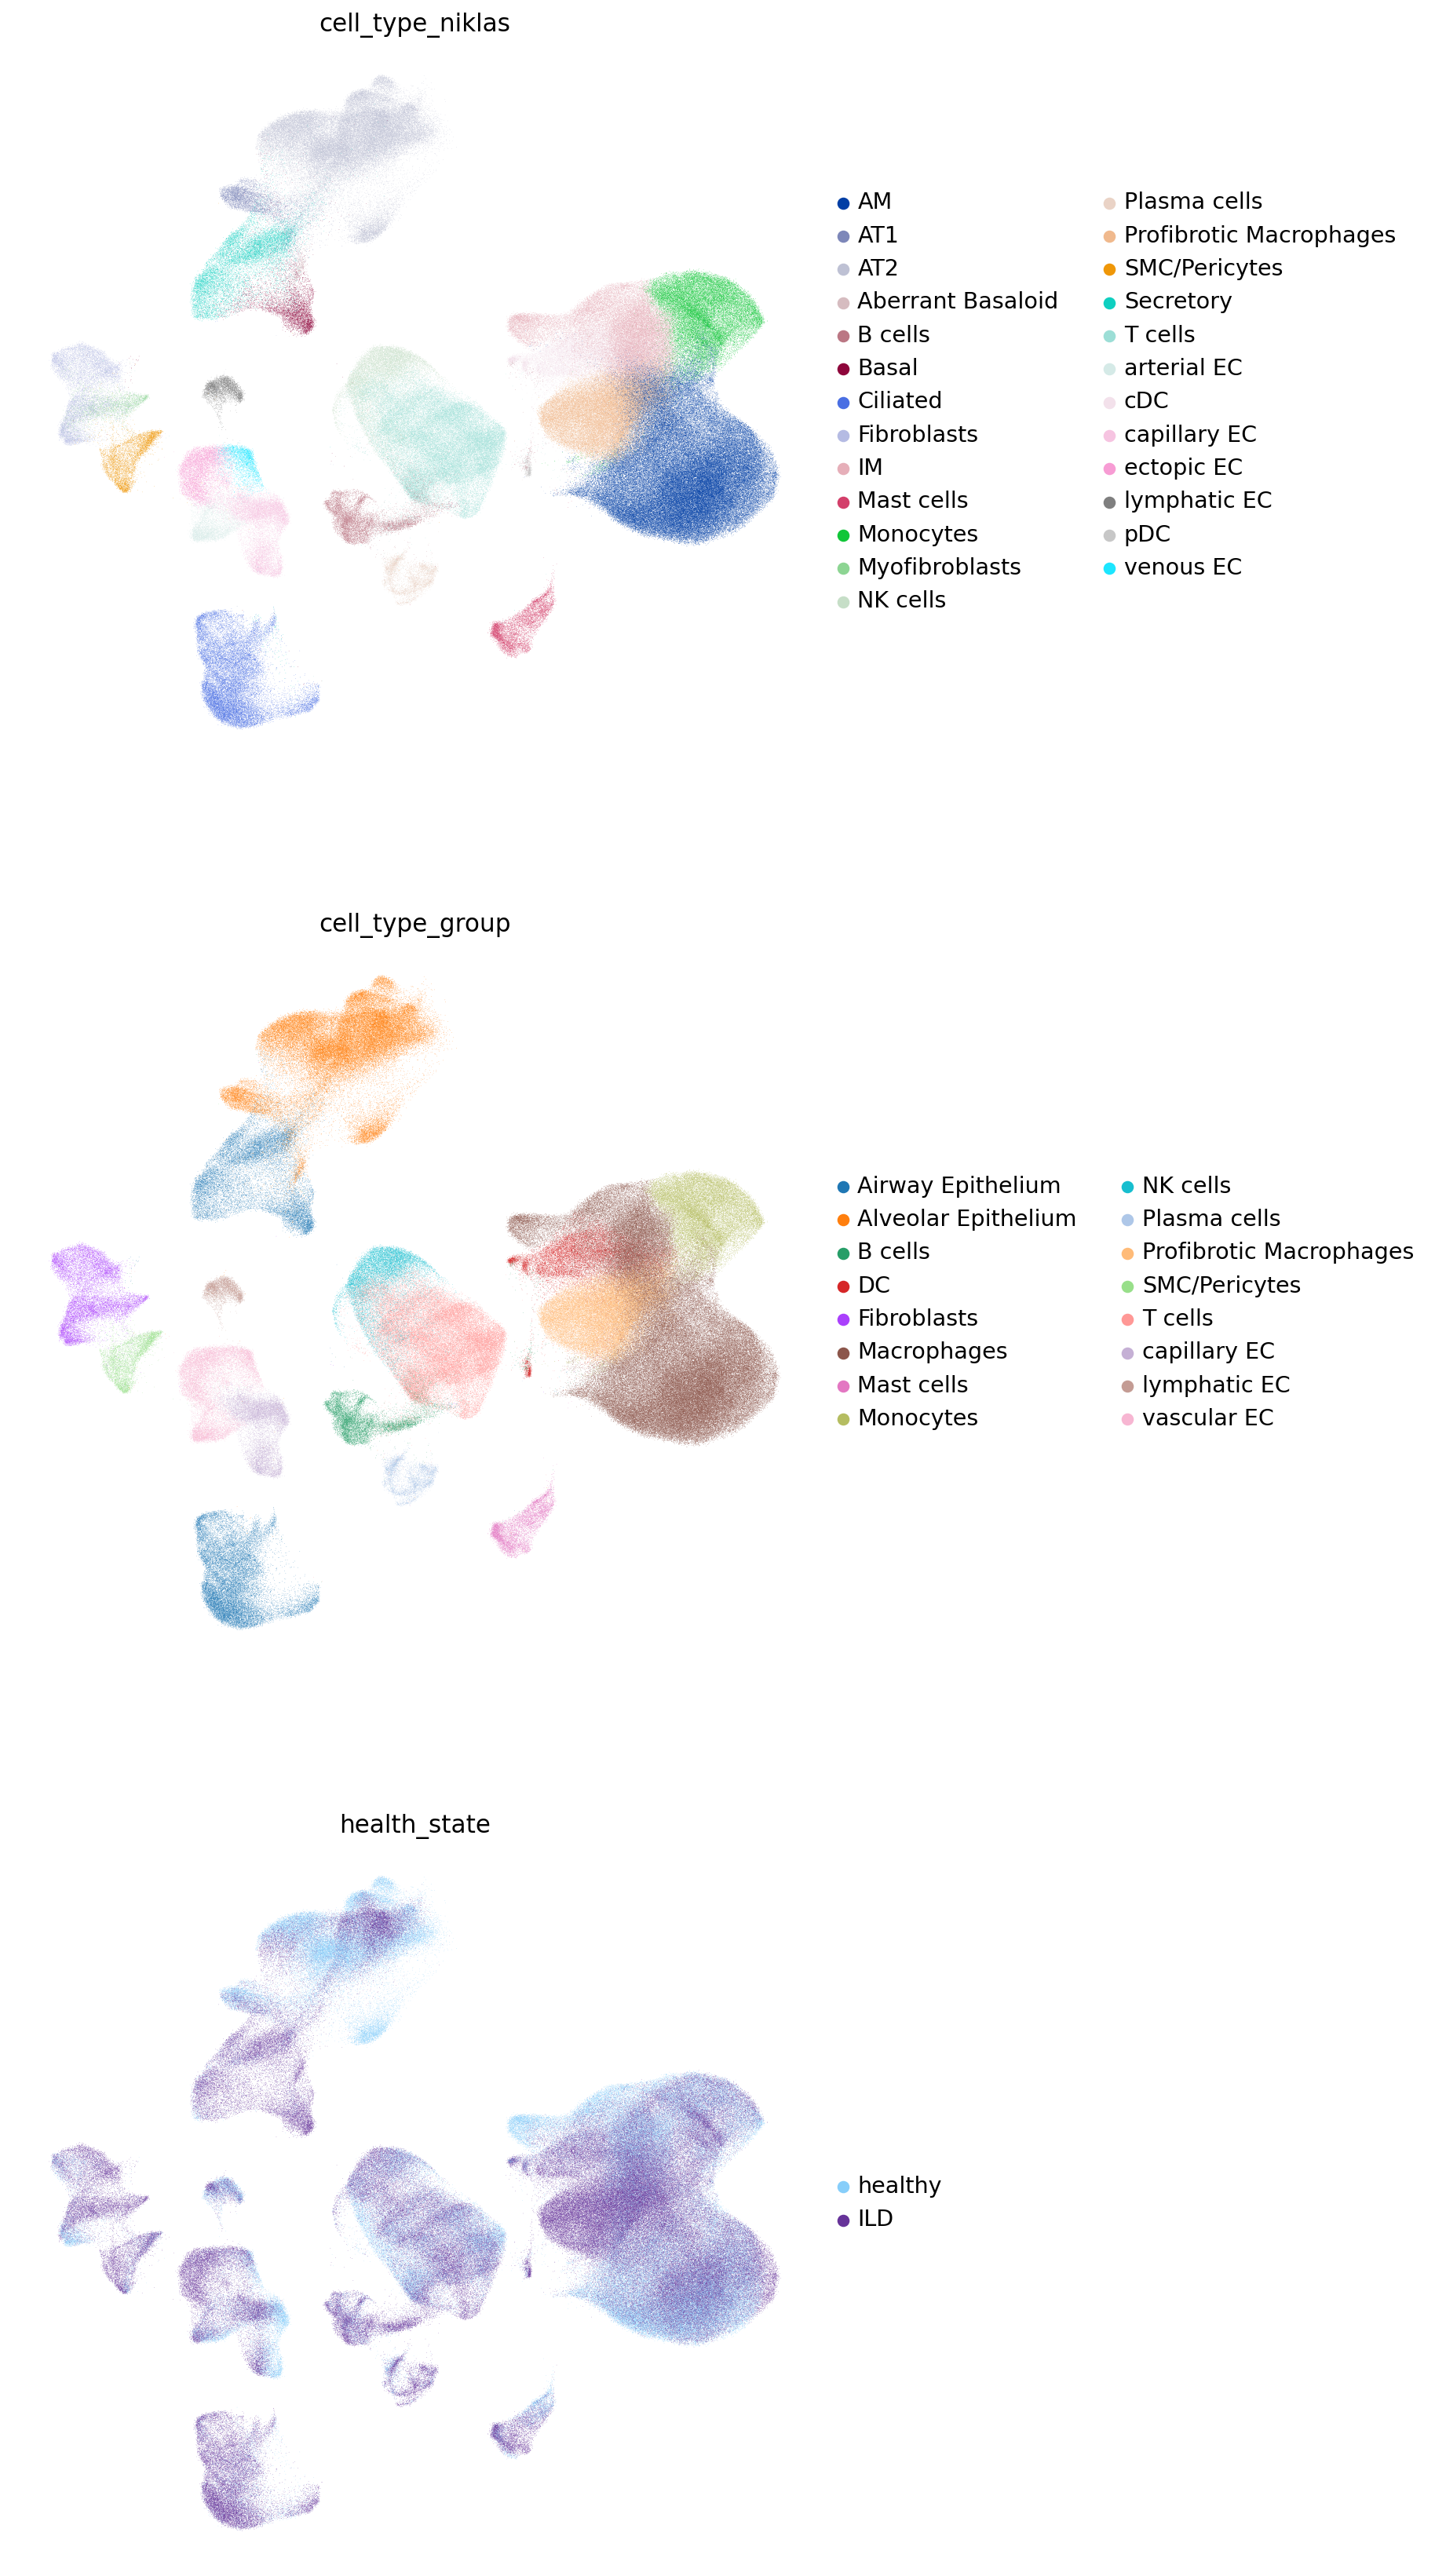

In [8]:
## overview UMAPs
sc.pl.umap(adata, color = ['cell_type_niklas',
                           'cell_type_group',
                           'health_state'], ncols = 1, frameon = False)

### Final Figures

In [9]:
## colour scheme for 'cell_type_group' UMAP
cell_type_group_colours = ['navy','magenta','crimson','orange','gold','darkgreen','lime',
                    'turquoise','blue','deepskyblue','darkmagenta','pink','red','#EEEF20','#AACC00']

In [18]:
adata.obs['cell_type_group'] = ['Macrophages' if ct in ['Macrophages','Profibrotic Macrophages'] else ct for ct in adata.obs['cell_type_group']]

Trying to set attribute `.obs` of view, copying.


In [21]:
## reorder cell type labels
adata.obs['cell_type_group'] = adata.obs['cell_type_group'].astype('category')
adata.obs['cell_type_group'] = adata.obs['cell_type_group'].cat.reorder_categories(['Alveolar Epithelium',
                                                                                    'Airway Epithelium',
                                                                                    'capillary EC',
                                                                                    'vascular EC',
                                                                                    'lymphatic EC',
                                                                                    'Fibroblasts',
                                                                                    'SMC/Pericytes',
                                                                                    'Monocytes',
                                                                                    'Macrophages',
                                                                                    'DC',
                                                                                    'Mast cells',
                                                                                    'B cells',
                                                                                    'Plasma cells',
                                                                                    'T cells',
                                                                                    'NK cells'
                                                                                   ])

In [35]:
adata.obs['cell_type_niklas'] = [ct if ctn == 'SMC/Pericytes' else ctn for ct,ctn in zip(adata.obs['cell_type'],adata.obs['cell_type_niklas'])]

In [37]:
adata.obs['cell_type_niklas'] = adata.obs['cell_type_niklas'].astype('category')
adata.obs['cell_type_niklas'].cat.categories

Index(['AM', 'AT1', 'AT2', 'Aberrant Basaloid', 'B cells', 'Basal', 'Ciliated',
       'Fibroblasts', 'IM', 'Mast cells', 'Monocytes', 'Myofibroblasts',
       'NK cells', 'Pericytes', 'Plasma cells', 'Profibrotic Macrophages',
       'SMCs', 'Secretory', 'T cells', 'arterial EC', 'cDC', 'capillary EC',
       'ectopic EC', 'lymphatic EC', 'pDC', 'venous EC'],
      dtype='object')

In [38]:
## reorder cell type labels
adata.obs['cell_type_niklas'] = adata.obs['cell_type_niklas'].astype('category')
adata.obs['cell_type_niklas'] = adata.obs['cell_type_niklas'].cat.reorder_categories(['AT1',
                                                                                      'AT2',
                                                                                      'Aberrant Basaloid',
                                                                                      'Basal',
                                                                                      'Ciliated',
                                                                                      'Secretory',
                                                                                      
                                                                                      'capillary EC',
                                                                                      'arterial EC',
                                                                                      'venous EC',
                                                                                      'ectopic EC',
                                                                                      'lymphatic EC',  
                                                                                      
                                                                                      'Fibroblasts',
                                                                                      'Myofibroblasts',
                                                                                      'SMCs',
                                                                                      'Pericytes',
                                                                                      
                                                                                      'Monocytes', 
                                                                                      'AM',
                                                                                      'IM',
                                                                                      'Profibrotic Macrophages',
                                                                                      'cDC',
                                                                                      'pDC',
                                                                                      'Mast cells',
                                                                                      'B cells',
                                                                                      'Plasma cells',
                                                                                      'T cells',
                                                                                      'NK cells'])

In [39]:
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())

In [40]:
from matplotlib import colors
gray_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N=128)

In [41]:
color_map = ['#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00',
             '#FFFF33','#A65628','#F781BF','#999999','#004301',
             '#00FFFF','#00008F','#5F0029','#FFF5FF','#4F4E51',
             '#B499FF','#6700F9','#4D006F','#00806C','#72FF9A',
             '#6A6C00','#E1C78B','#63C1FE','#D90083','#5A3500',
             '#42BBA9','#B29A00','#F203FF','#920000','#004F74'    
            ]

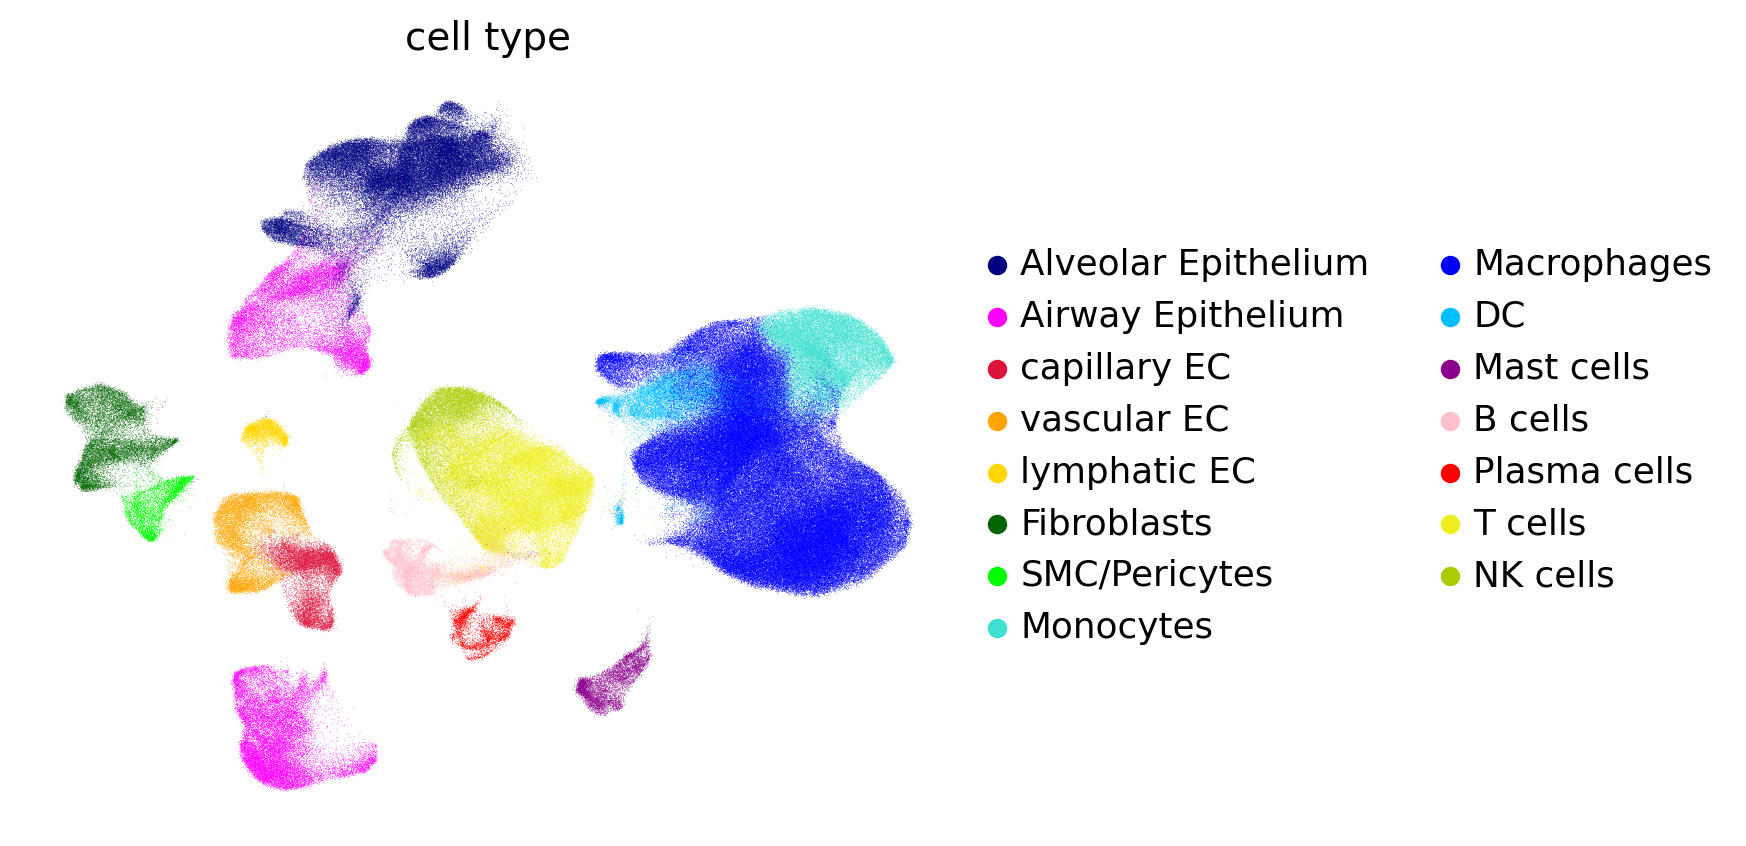

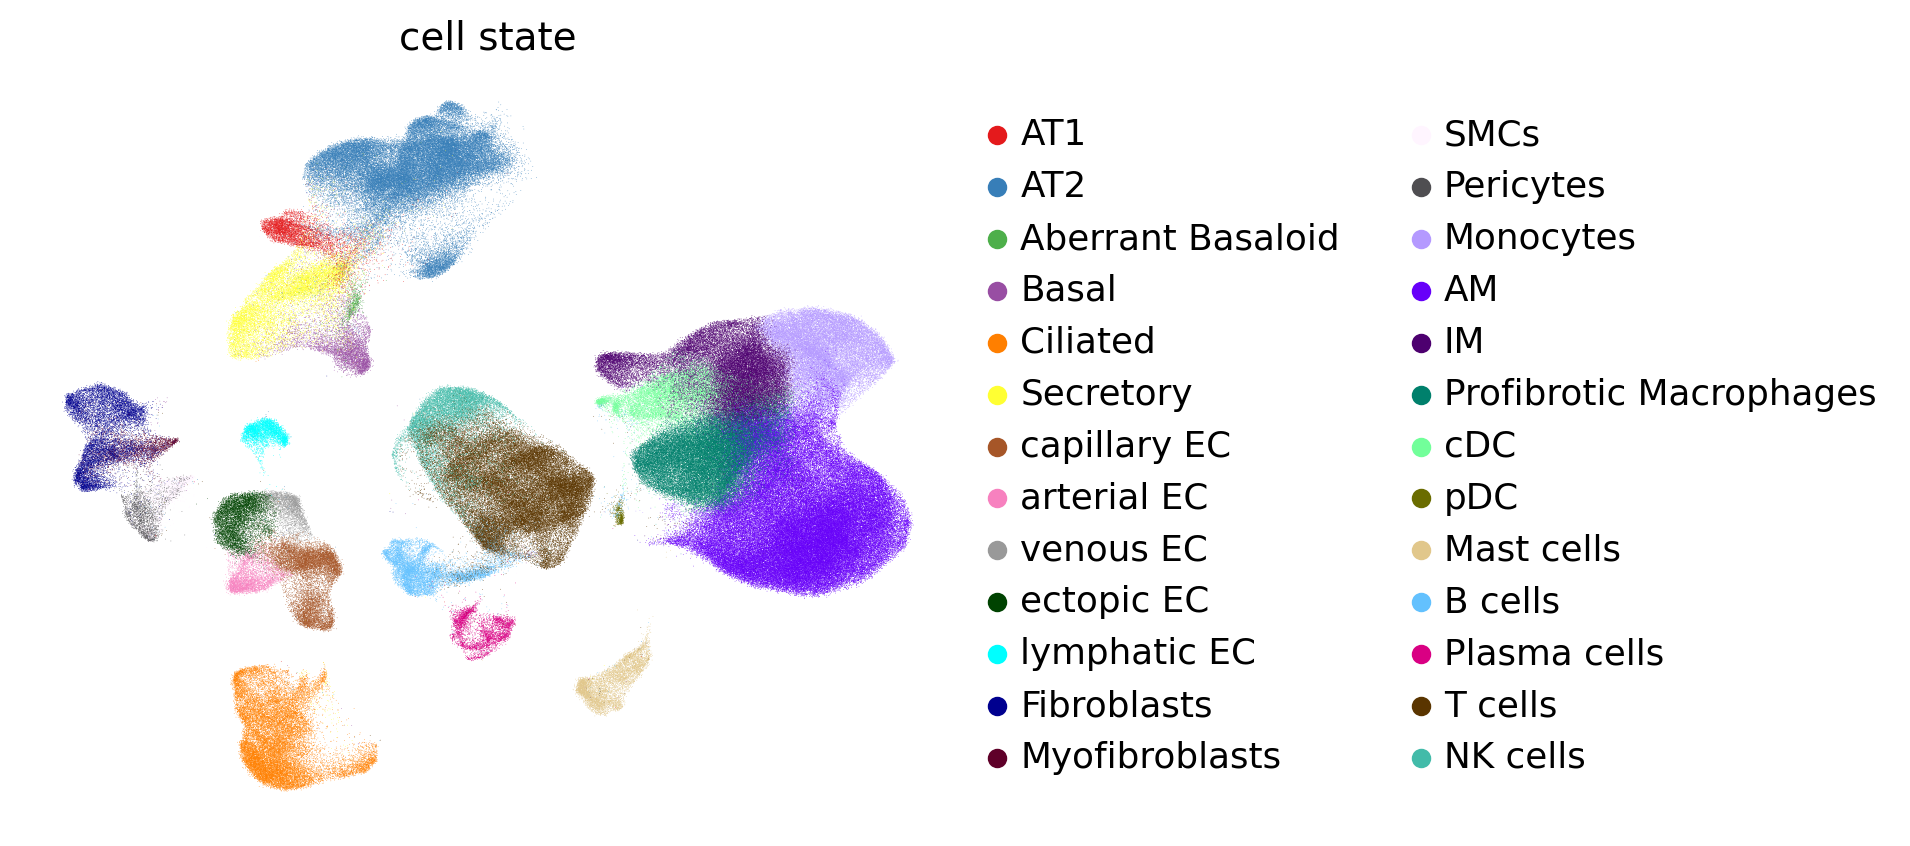

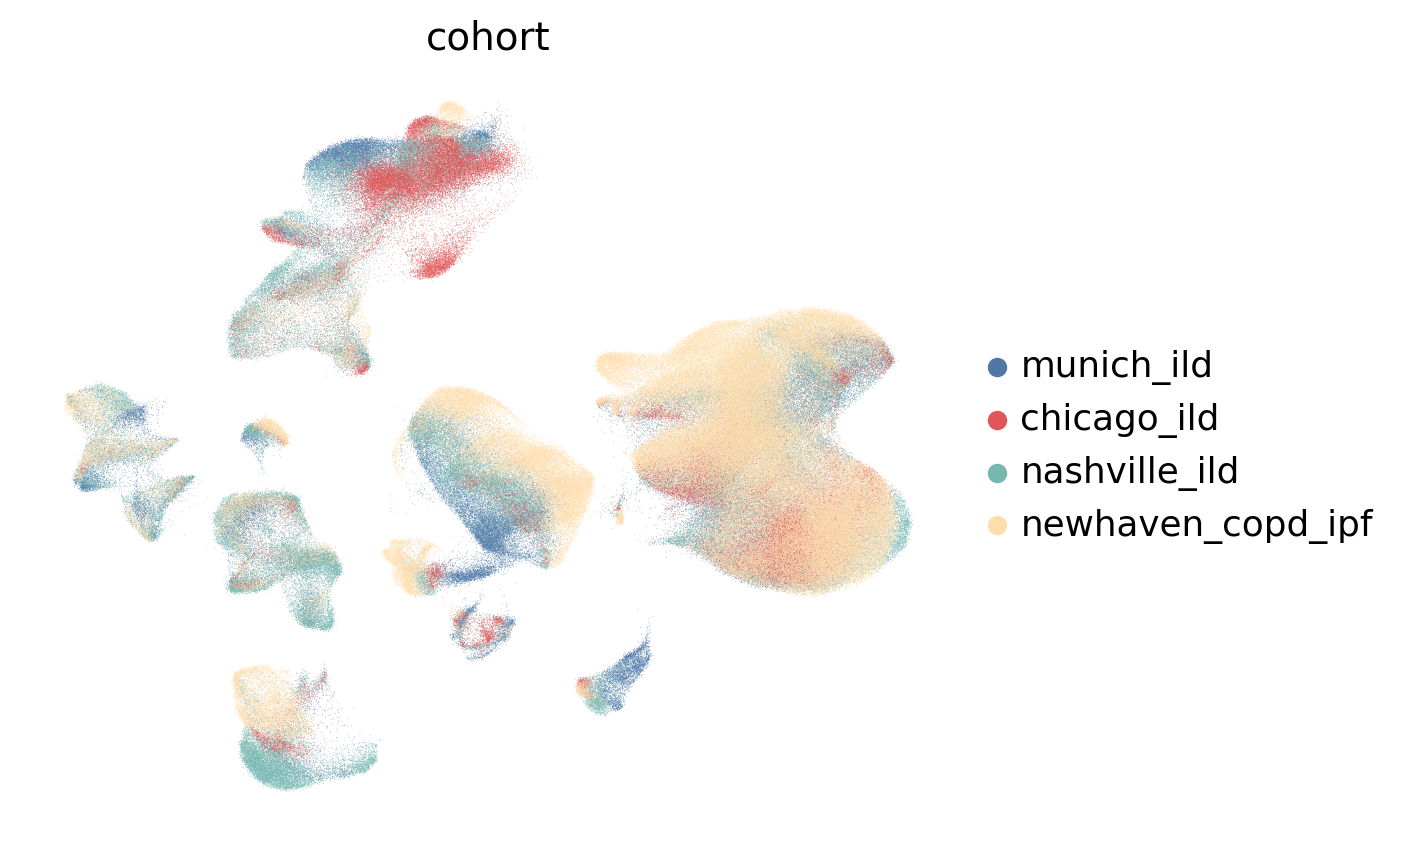

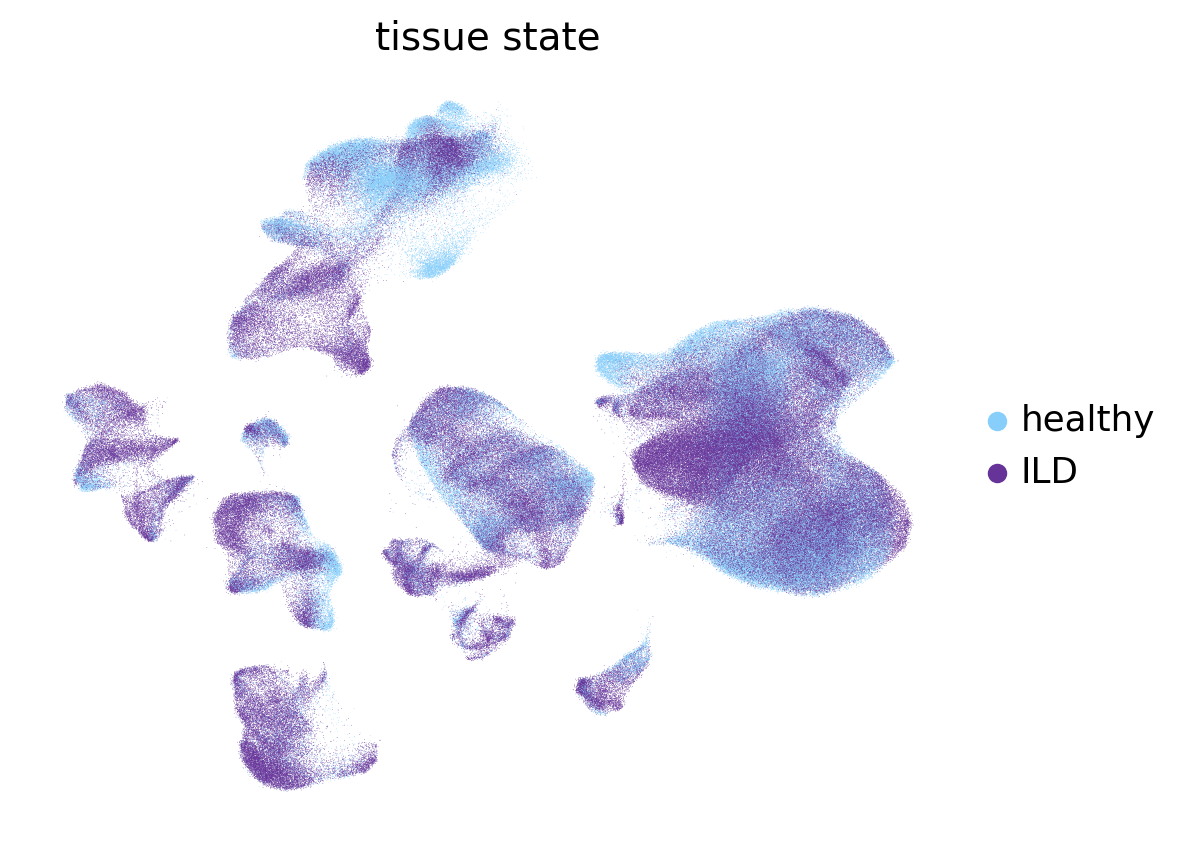

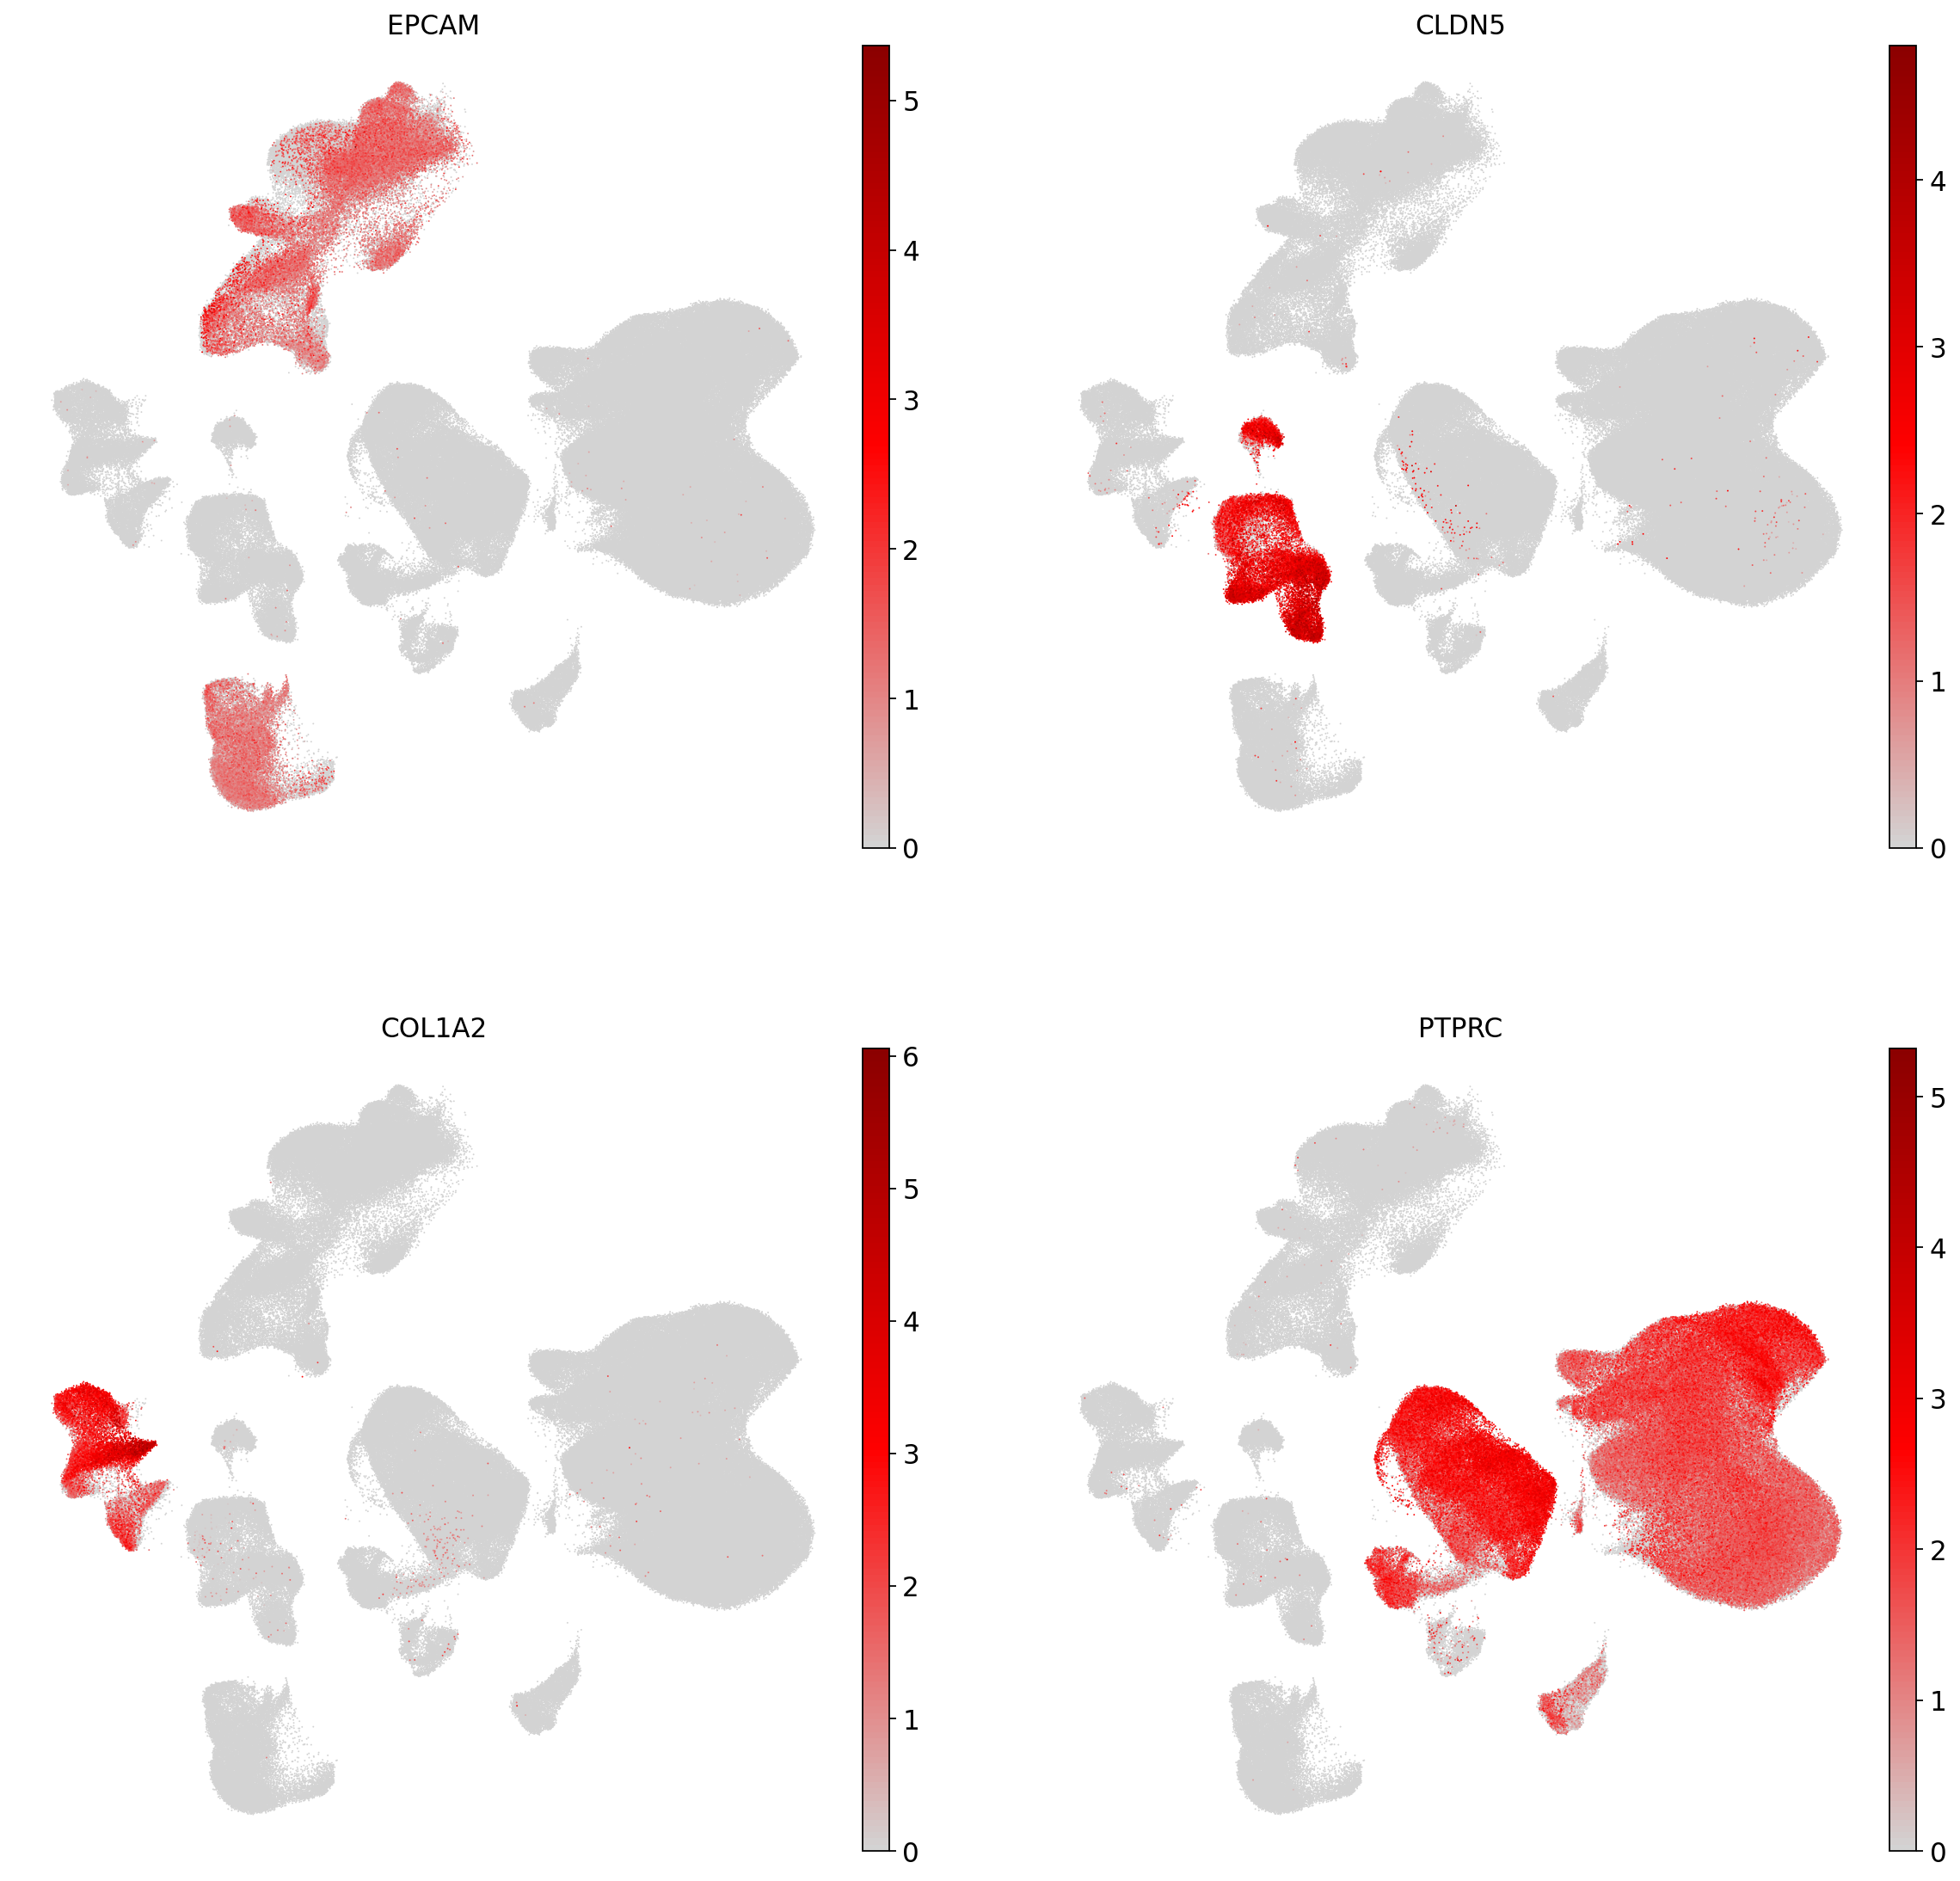

In [42]:
## cell type
sc.pl.umap(adata, color = ['cell_type_group'], title = 'cell type', frameon = False, palette = cell_type_group_colours,
           ax = mysize(6, 5, 100), save = '_celltype.pdf')
## cell type
sc.pl.umap(adata, color = ['cell_type_niklas'], title = 'cell state', frameon = False, palette = color_map,
           ax = mysize(6, 5, 100), save = '_cellstate.pdf')
## dataset
sc.pl.umap(adata, color = ['data_set'], title = 'cohort', frameon = False,
           ax = mysize(6, 5, 100),  save = '_data_set.pdf')                           
## sample/treament
sc.pl.umap(adata, color = ['health_state'], title = 'tissue state', frameon = False,
           ax = mysize(6, 5, 100), save = '_health_state.pdf')
## lineage marker genes
sc.pl.umap(adata, color = ['EPCAM','CLDN5','COL1A2','PTPRC'], frameon = False, ncols = 2, size = 3,
           cmap = gray_red, save = '_lineage_markers.pdf')

In [43]:
#adata.obs['cell_type_group'] = adata.obs['cell_type_group'].cat.reorder_categories(['Alveolar Epithelium', 'Airway Epithelium', 'capillary EC',
#       'vascular EC', 'lymphatic EC', 'Fibroblasts', 'SMC/Pericytes',
#       'Monocytes', 'Macrophages',  'DC', 'Mast cells', 'B cells',
#       'Plasma cells', 'T cells', 'NK cells'])

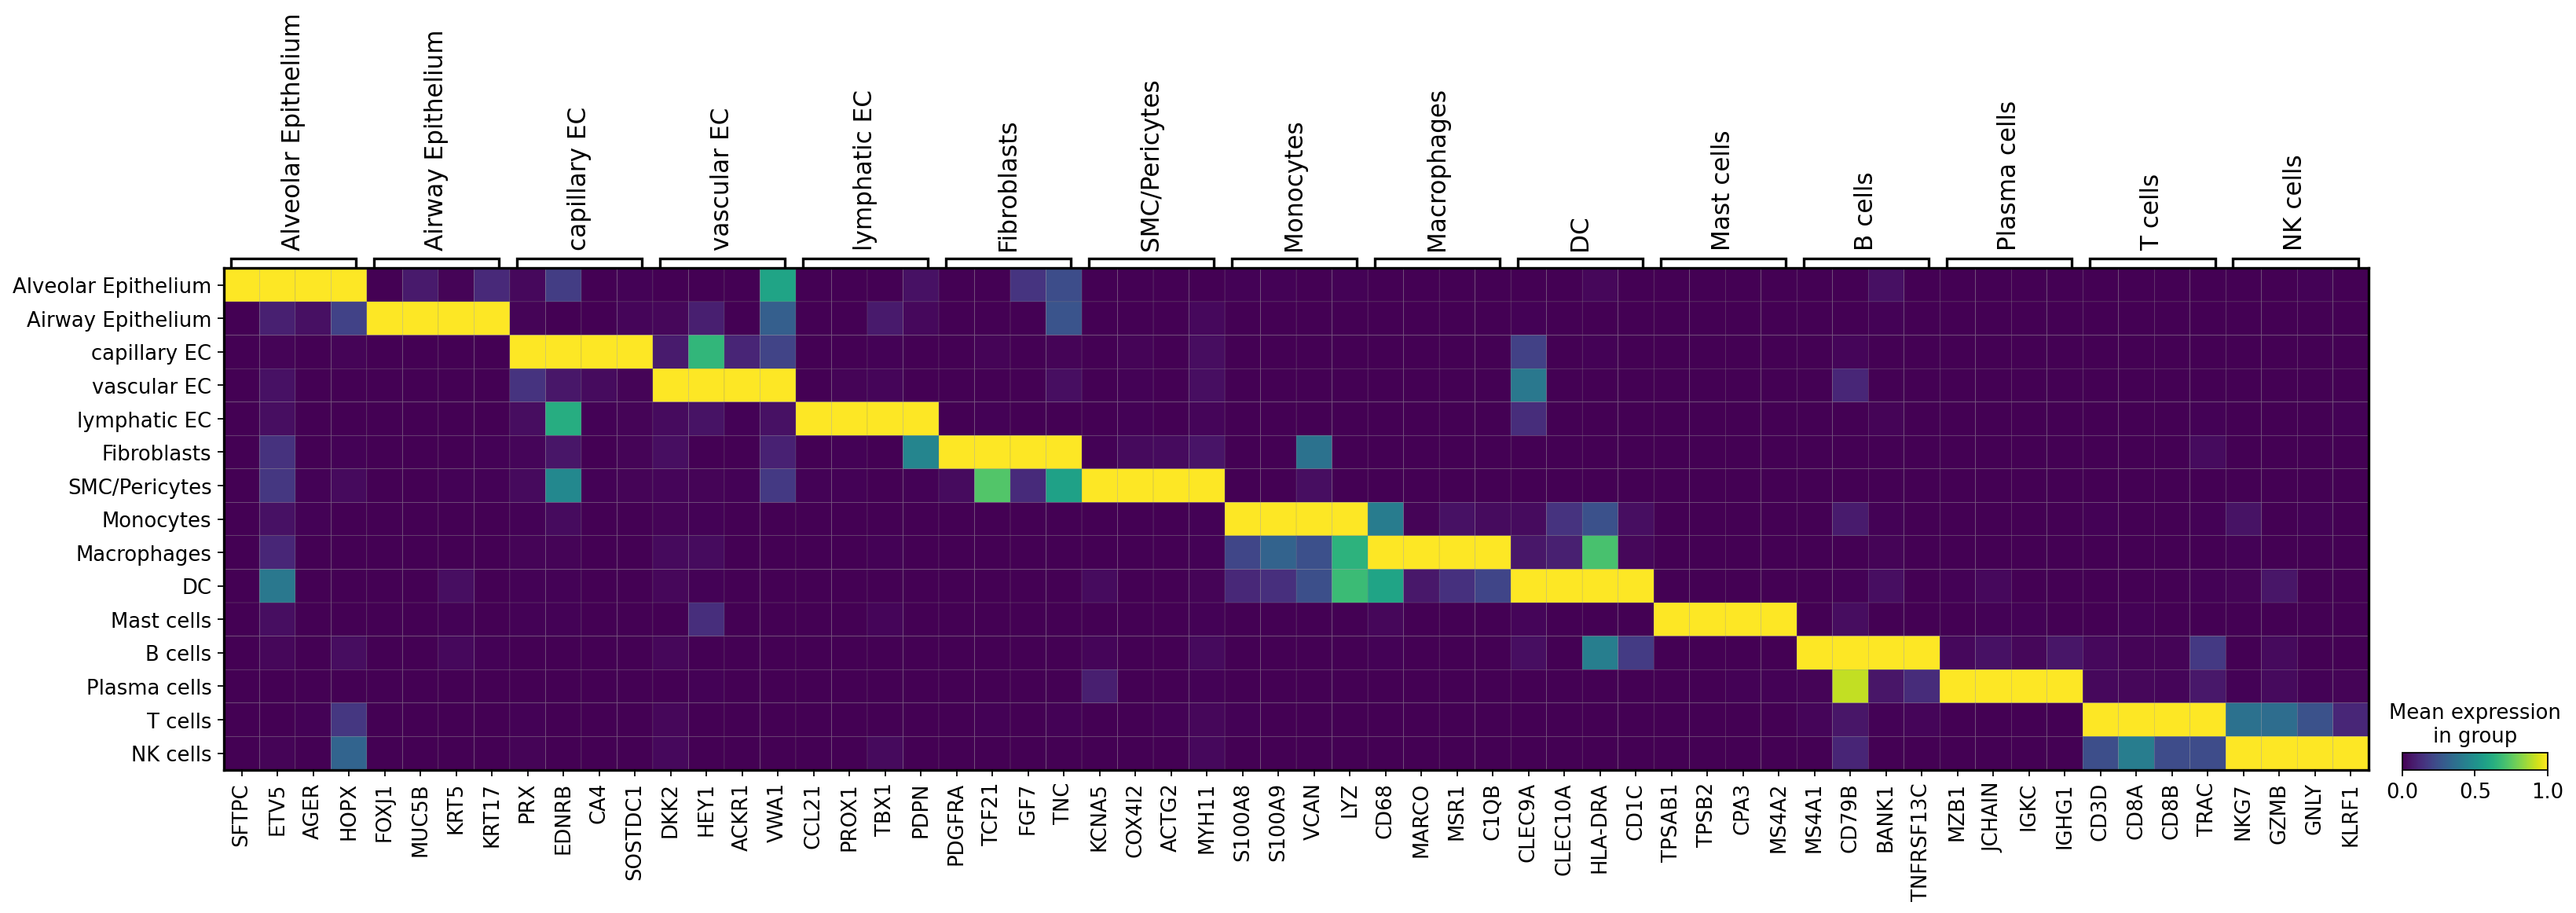

In [16]:
## custom heatmap
# matrixplot with marker genes
celltype_markers={'Alveolar Epithelium' : ['SFTPC','ETV5','AGER','HOPX'],
                  'Airway Epithelium' : ['FOXJ1','MUC5B','KRT5','KRT17'],
                  'capillary EC' : ['PRX','EDNRB','CA4','SOSTDC1'],
                  'vascular EC' : ['DKK2','HEY1','ACKR1','VWA1'],
                  'lymphatic EC' : ['CCL21','PROX1','TBX1','PDPN'],
                  'Fibroblasts' : ['PDGFRA','TCF21','FGF7','TNC'],
                  'SMC/Pericytes' : ['KCNA5','COX4I2','ACTG2','MYH11'],
                  'Monocytes' : ['S100A8','S100A9','VCAN','LYZ'],
                  'Macrophages' : ['CD68','MARCO','MSR1','C1QB'],
                  'DC' : ['CLEC9A','CLEC10A','HLA-DRA','CD1C'],
                  'Mast cells' : ['TPSAB1','TPSB2','CPA3','MS4A2'],
                  'B cells' : ['MS4A1','CD79B','BANK1','TNFRSF13C'],
                  'Plasma cells' : ['MZB1','JCHAIN','IGKC','IGHG1'],
                  'T cells' : ['CD3D','CD8A','CD8B','TRAC'],
                  'NK cells' : ['NKG7','GZMB','GNLY','KLRF1']
}
sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type_group',standard_scale='var', dendrogram=False,
                     save='curated_markers.pdf' )

In [17]:
## frequency table
xlabel = 'health_state'
cell_types_label = 'cell_type_group'
cols = adata.uns['%s_colors' %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = sct.calc.relative_frequencies(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

Alveolar Epithelium  Airway Epithelium  capillary EC  vascular EC  \
001C             0.022660           0.020274      0.006559     0.001789   
002C             0.003284           0.022989      0.003284     0.000000   

      lymphatic EC  Fibroblasts  SMC/Pericytes  Monocytes  Macrophages  \
001C      0.029815     0.008945       0.000596   0.307096     0.508646   
002C      0.000000     0.000000       0.000000   0.029557     0.839080   

            DC  Mast cells   B cells  Plasma cells   T cells  NK cells  \
001C  0.009541    0.000000  0.016100      0.002982  0.025641  0.039356   
002C  0.004926    0.003284  0.021346      0.000000  0.059113  0.013136   

     health_state  
001C      healthy  
002C      healthy

Saving Figure to 
/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/rel_freqs.pdf

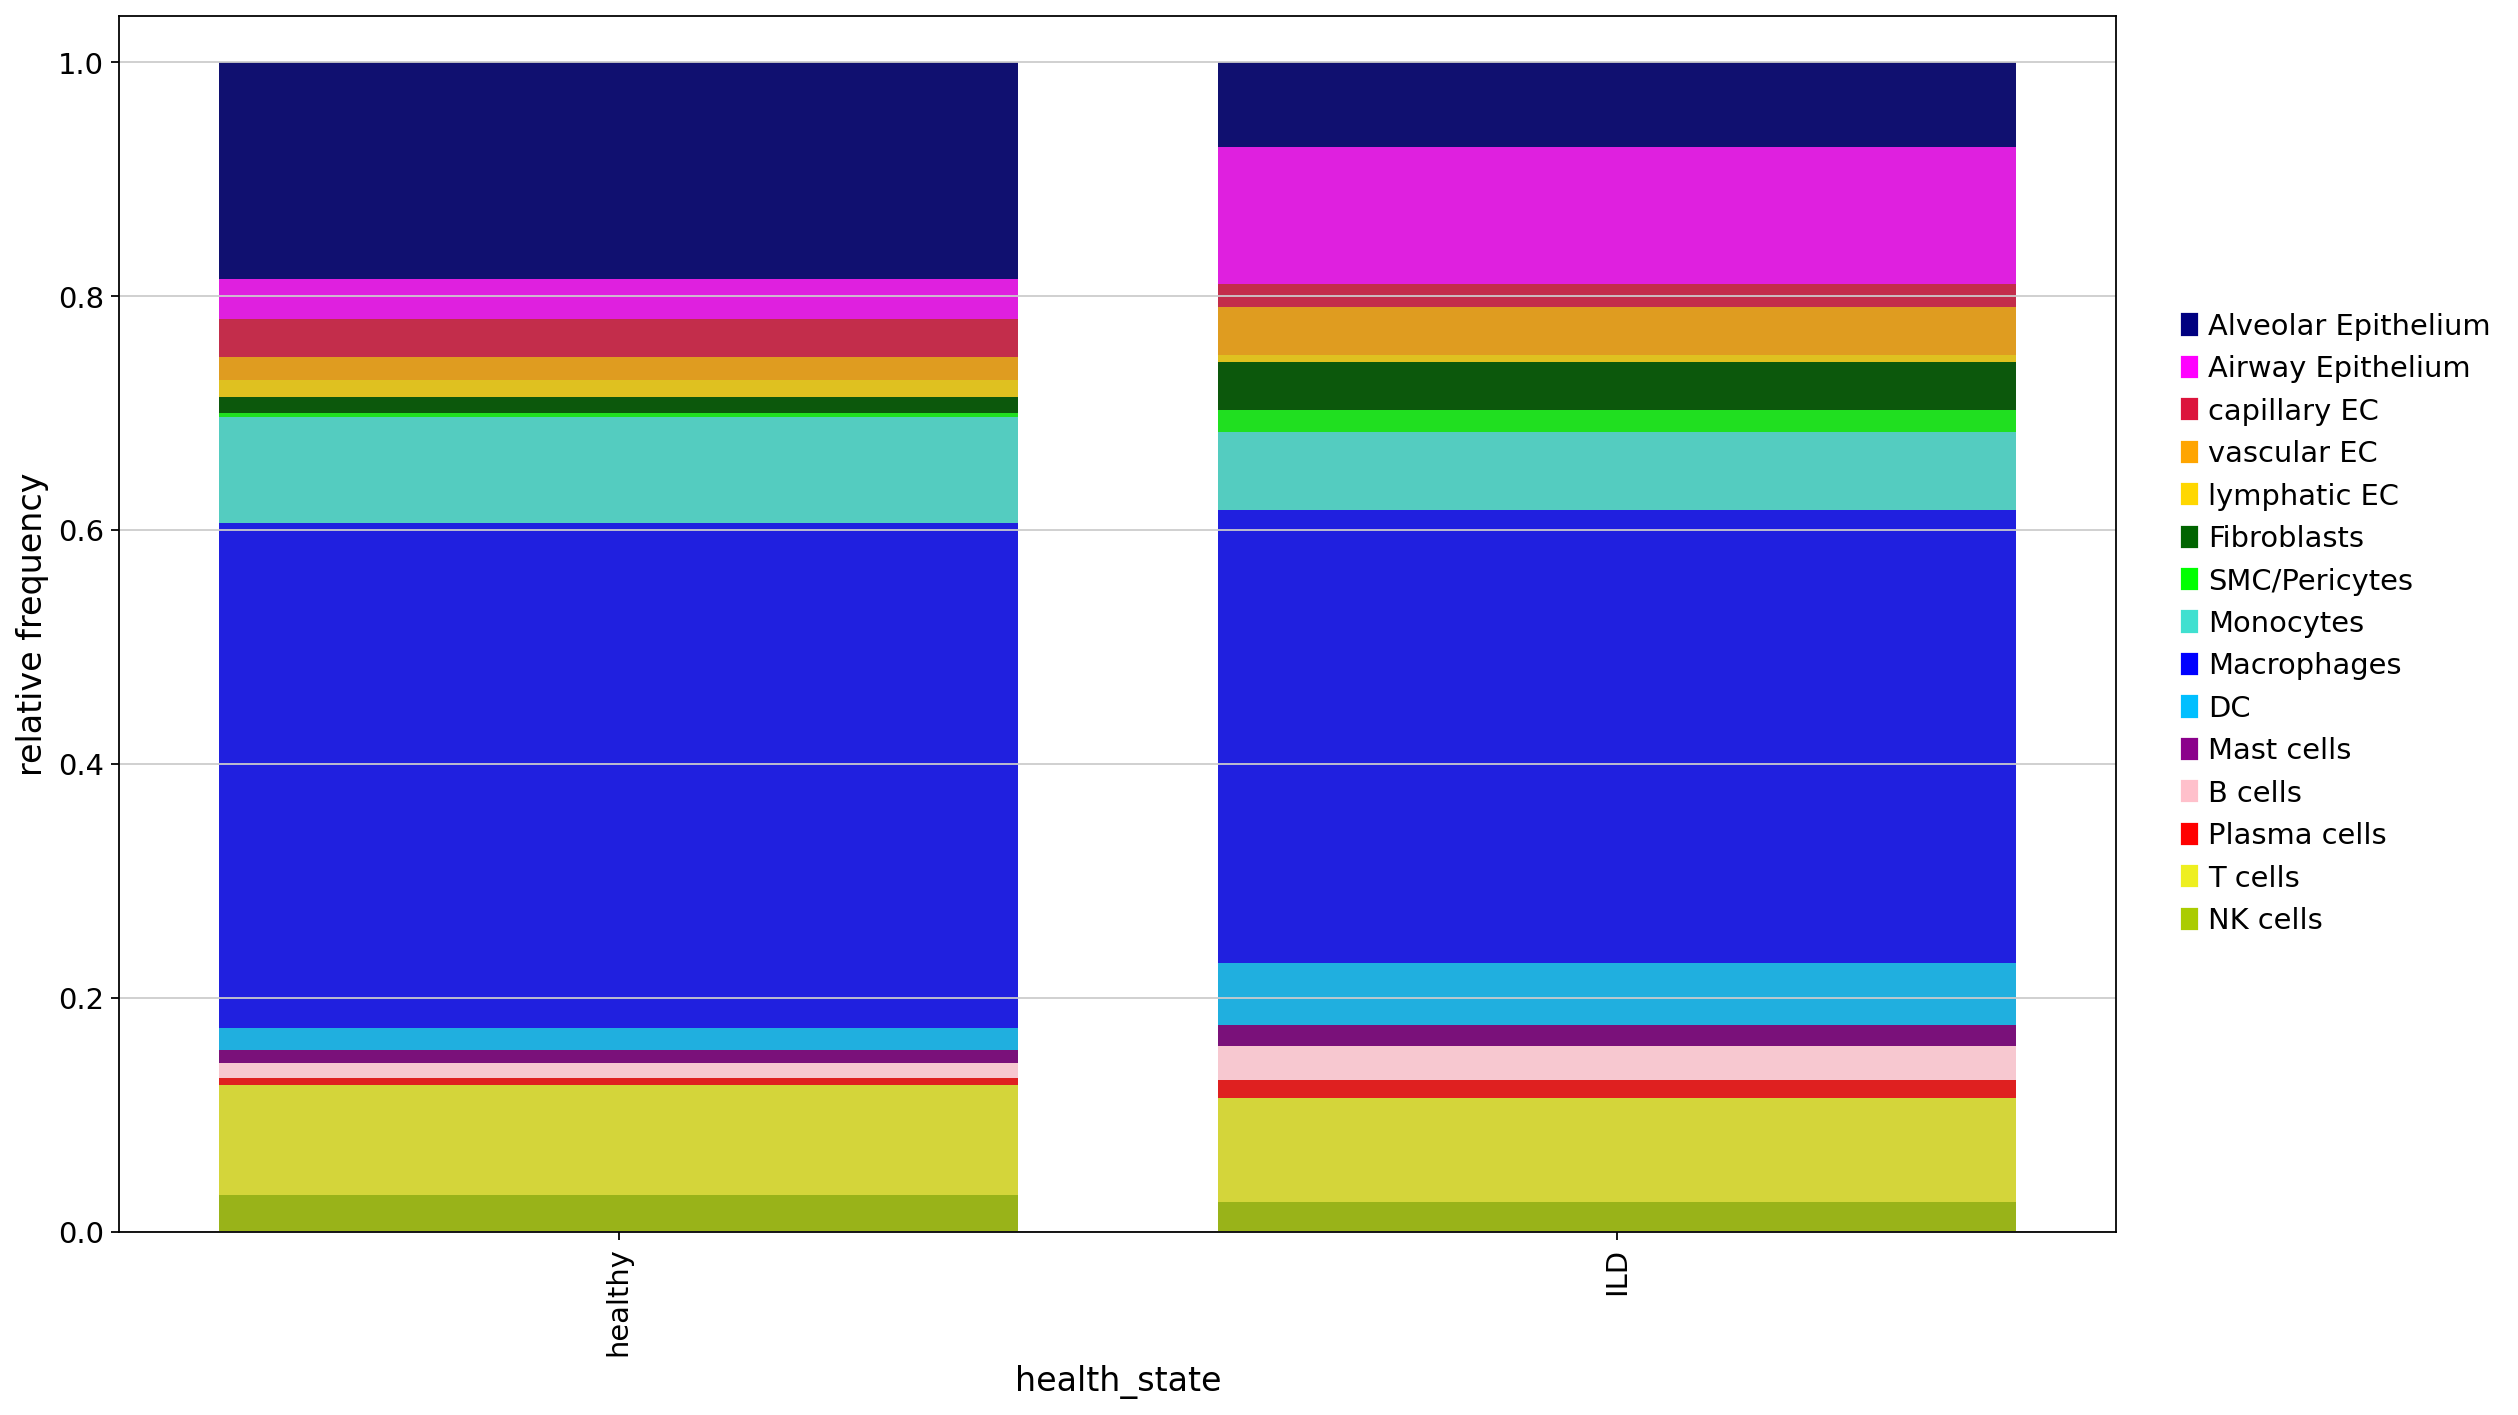

In [18]:
## cell type frequencies per  category
sct.plot.cluster_composition_stacked_barplot(relFreqs, xlabel = xlabel, figsize = (16,10), order = ['healthy', 'ILD'],
                              colors = cols, width = 0.8,
                              save = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/02_figures/rel_freqs.pdf')

### Complementary heatmap for NicheNet analysis in Fig. 7

In [19]:
adata.obs['cell_type_niklas']= adata.obs['cell_type_niklas'].cat.reorder_categories(['AT1',
                                                                                     'AT2',
                                                                                     'Aberrant Basaloid',
                                                                                     'Basal', 'Ciliated', 'Secretory',
                                                                                     'capillary EC',
                                                                                     'arterial EC', 'venous EC',
                                                                                     'ectopic EC',
                                                                                     'lymphatic EC',
                                                                                     'Fibroblasts',
                                                                                     'Myofibroblasts',
                                                                                     'SMC/Pericytes',
                                                                                     'Monocytes','Macrophages','DC','Mast cells', 
                                                                                     'B cells', 'Plasma cells', 
                                                                                     'T cells', 'NK cells'    
])

In [22]:
### top10 ligands
#ligands = ['CTGF','CSF2','VEGFA','TNFSF15','FASLG','CXCL2','XCL2','NCAM1','XCL1','WNT2','TFPI','TG',
#           'EFNB3','THBS4','TNC','CDH1','FAM3D','RTN4','POMC','TNFSF12','SEMA4D','RELN','ITGB1','NTS','IL6',
#           'JAM2','ANXA1','ALOX5AP','ALCAM','TNF','IL1B','TGFB1','PTGS2','HGF','LIF','FGF2','PKD1','EBI3',
#           'INHBA','BTLA','CRLF1','OCLN','CCL21','CXCL6','AIMP1','RPS19','PTDSS1','ROBO2','SEMA3F','ARF1','MANF',
#           'SDK1','CXCL12','IFNG','CD28','ICAM1','IL24','IL1RN','IL10','APP','CCL2','BMP5','BMP4','C5','DUSP18',
#           'PIK3CB','YARS','VCAM1','FGF14','EFNA5','CLDN11','L1CAM','EREG','PROS1','EDN1','IL18','HAS2']

In [23]:
ligands = ['PIK3CB','CXCL2','ICAM1','CTGF','XCL1','XCL2','TGFB1','VEGFA','EDN1','CXCL5','POMC','TNFSF12',
           'CCL28','CXCL12','CXCL6','CCL20','CSF2','INHBA','FASLG','COL18A1','TNFSF15','IL15','SAA1','IL18',
           'HAS2','IL6','IL1B','BMP5','BMP2','CDH3','PTGS2','PGF','FGF2','CAMP','ANXA1','IFNG','TNF','PTPRF',
           'CXCL16','C3','JAM2','ALOX5AP','ALCAM','GLG1','JAM3','IL33','ITGAM','CCL5','INHBB','CCL3','IL1A','CD28',
           'IL24','IL1RN','PCDH7','F11R','AIMP1','RPS19','PTDSS1','COPA','ROBO2','SEMA3F','ARF1','SEMA7A','NENF',
           'HEBP1','CD99','EFNB1','CYR61','MANF','SDK1','IL10','APP','CCL2','BMP4','C5','CXCL3','CALM1','ADAM12',
           'TGFB3','CDH5','LIF','SELE','BTLA','SELP','CRLF2','TNFSF13B','CCL21','ITGB7','OCLN','EBI3','OSM','TSLP',
           'CRLF1','PTPRC','GSTP1','FAM3D','HGF','RTN4','GMFB','HSPG2','LAMB1','BTC','LAMC3','PNOC','NTS',
           'SEMA4D','DUSP18','ITGB1','RELN','FGF14','EFNA5','CLDN11','EREG','PROS1','SEMA3E','ANGPT2','PLXNB2',
           'HLA-A','FGF18','PDGFC','VCAM1','ITGA4','ICAM5','L1CAM','DSC2','YARS','CDH1','EFNA1','NMB','LAMB2',
           'NCAM1','TNC','PKD1','TG','WNT2','TFPI','EFNB3','THBS4','NRG4','NRG2','WNT9A','VWF','SEMA3B','DCHS1',
           'PSEN1','PCDH9'
]

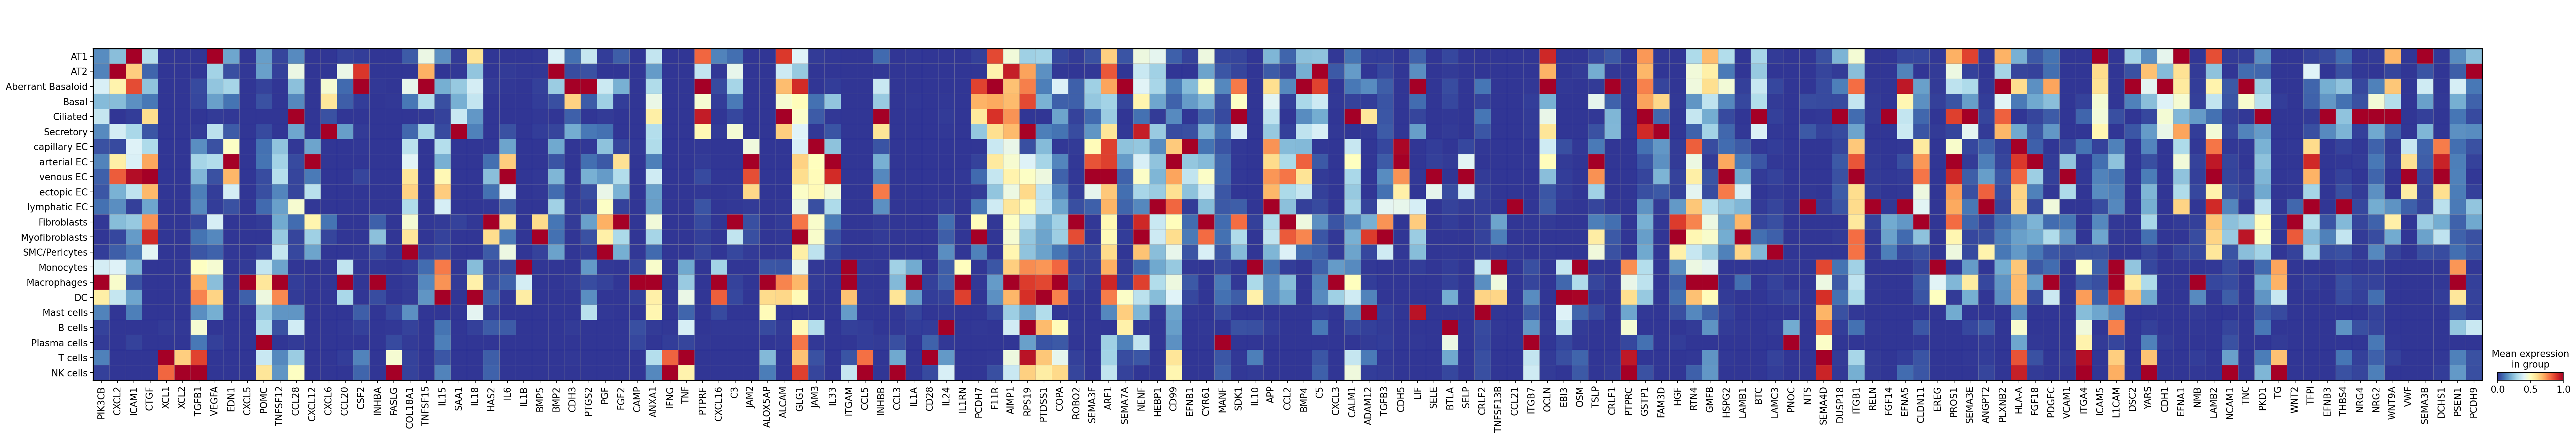

In [24]:
## custom heatmap
# global ligand expression (as predicted by NicheNet)
sc.pl.matrixplot(adata, ligands, groupby = 'cell_type_niklas', standard_scale = 'var',
                 #layer = 'scaled', vmin = -1.5, vmax = 1.5,
                 dendrogram = False,  cmap = 'RdYlBu_r',
                 #colorbar_title = 'mean z-score', 
                 swap_axes = False, 
                 save = 'ligand_expression.pdf' )